<a href="https://colab.research.google.com/github/sujeet311/Quantuma_Boosting/blob/main/featureselection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FINALCODE/Data/process_d.csv') #Load the CSV file
df.shape

(229474, 23)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck',
       'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
       'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
       'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex',
       'Age', 'Education', 'Income'],
      dtype='object')

In [ ]:
df.head(5)
df= df.drop('Unnamed: 0',axis=1)

# Feature Importance

---



In [ ]:
y = df['Diabetes_binary']
X = df.drop('Diabetes_binary',axis = 1)

In [ ]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

selectKbest algorithms

---



In [ ]:
#apply selectkbest algorithms
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ordered_rank_features = SelectKBest(score_func=chi2,k=20)
ordered_features=ordered_rank_features.fit(X,y)

pd.DataFrame(ordered_features.scores_,columns = ["score"] )
dfscores = pd.DataFrame(ordered_features.scores_,columns = ["score"] )
dfcolumns = pd.DataFrame(X.columns)

features_rank = pd.concat([dfcolumns,dfscores],axis=1)
features_rank_columns = ["Features","score"]

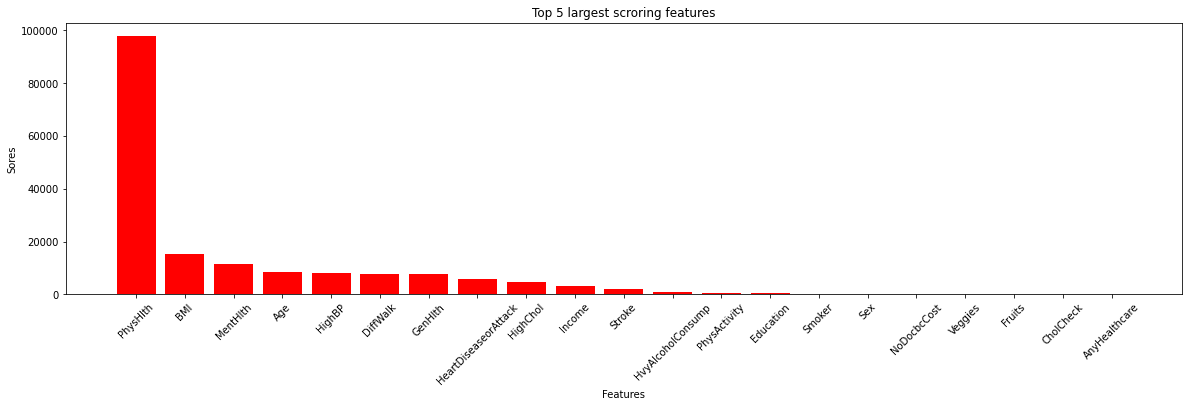

In [ ]:
dflv= features_rank.nlargest(21,'score')
dflv. to_csv(r"f1.csv",index= False)
# Initialize the lists for X and Y
data = pd.read_csv('f1.csv')

df1 = pd.DataFrame(data)

A= list(dflv.iloc[:, 0])
B = list(dflv.iloc[:, 1])
plt.figure(figsize = (20,5))
# Plot the data using bar() method
plt.bar(A, B, color='r')
plt.title("Top 5 largest scroring features")
plt.xlabel("Features")
plt.ylabel("Sores")
plt.xticks(rotation=45)
# Show the plot
plt.show()

# Feature Importance by Extratree classifier

---



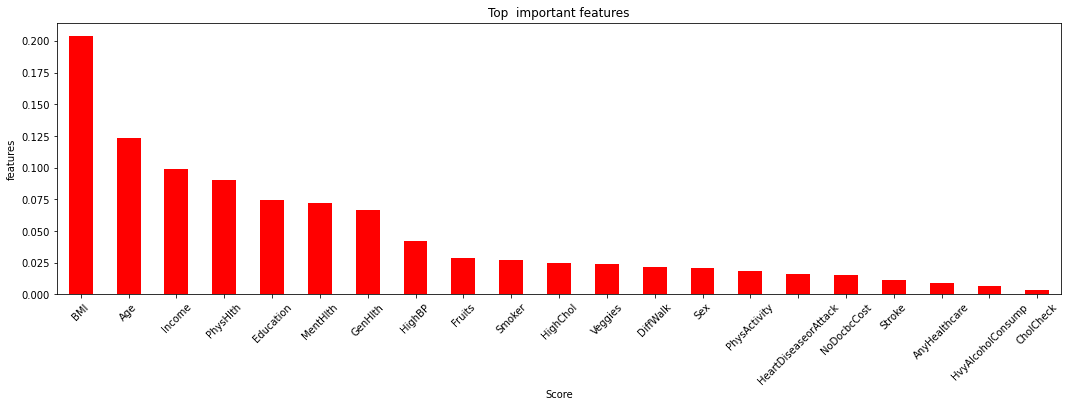

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(21)
plt.figure(figsize = (18,5))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(21).plot(kind='bar', color = 'r')

plt.title("Top  important features")
plt.xlabel("Score")
plt.ylabel("features")
plt.xticks(rotation=45)
plt.show()

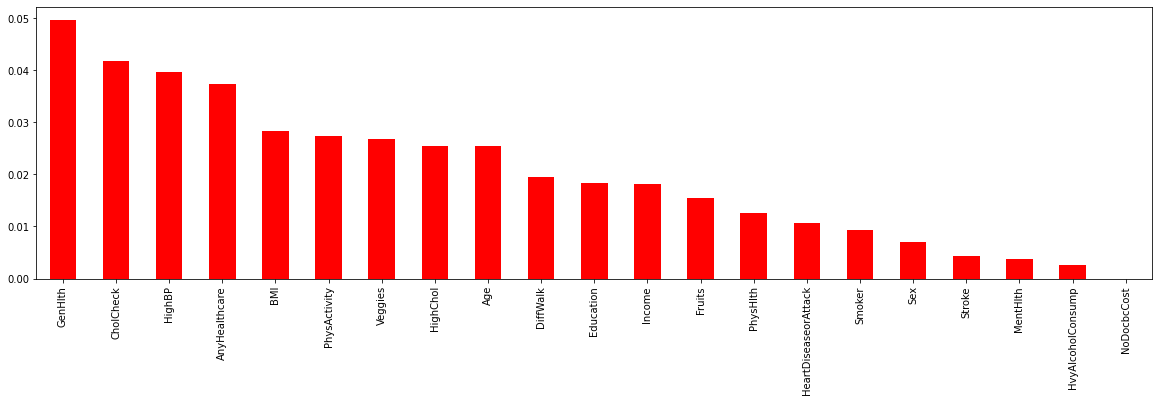

In [ ]:
#information gain
from sklearn.feature_selection import mutual_info_classif
plt.figure(figsize = (20,5))
mutual_info=mutual_info_classif(X,y)
mutual_data=pd.Series(mutual_info,index=X.columns)

mutual_data.nlargest(30).plot(kind='bar', color = 'r')

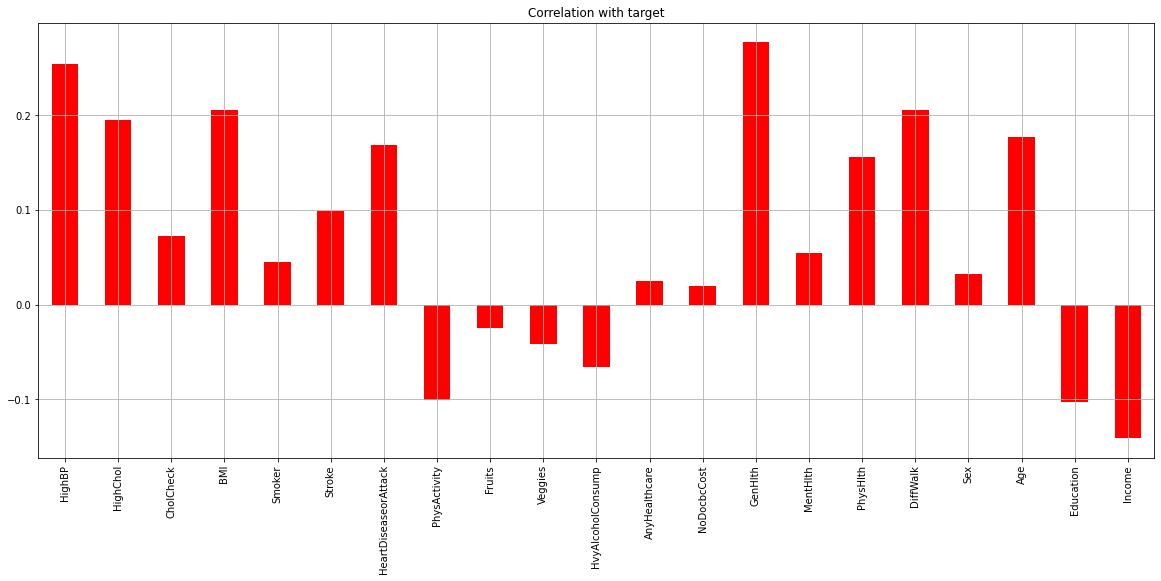

In [ ]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with target",color="red");

In [ ]:
df.columns


Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
to_drop = ['NoDocbcCost','AnyHealthcare','Stroke']
preposs_data = df.drop(to_drop,axis = 1)

**Features with high correlation**
are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.¶



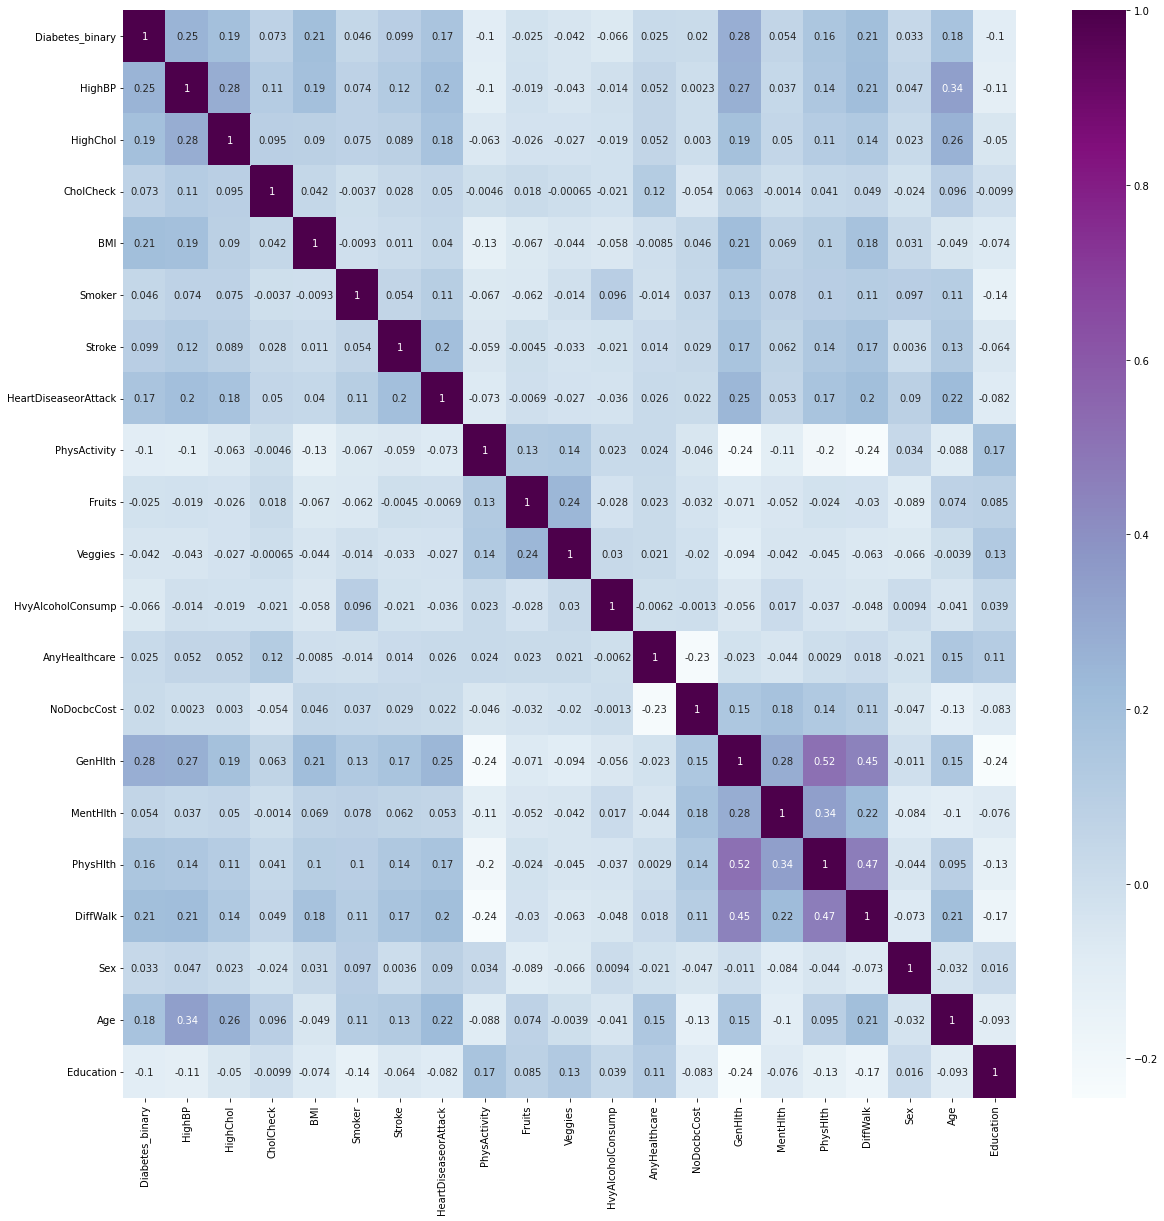

In [ ]:
corr = df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True,cmap="BuPu")

In [ ]:
threshold=0.5

In [ ]:
# find and remove correlated features
def correlation(dataset, threshold):
  col_corr = set()  # Set of all the names of correlated columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
  return col_corr

In [ ]:
correlation(df.iloc[:,:-1],threshold)

{'PhysHlth'}

 In this data there is no such kind of variables present which correlation with independent variable is more than 0.70, so for this reason none of the features removed.

In [ ]:
#save the changes in data for further operation

df.to_csv('/content/drive/MyDrive/FINALCODE/Data/red_db.csv')